In this notebook we do $KKL$ gradient descent for different dimention $d$. We adapt the parameters $h$ and $\sigma$ to the dimension. 

In [2]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import time

import kkl.divergences as dv
import kkl.kernels as kl
import kkl.gradient_descent as gd
import kkl.generate_y as gy
import cProfile

# p and q gaussians

In [3]:
##############################
######## PARAMETERS ##########
##############################

n = 50 # nombre de particules pour p
m = 50 # nombre de particules pour q
T = 100 # nombre d'itérations
eps = 0.0001
alpha = 0.01

### KERNEL ###


3.4871174646697627
T = 0


C:\Users\cleme\DOC\Annee_2023_2024\code\Regularized\kkl\divergences.py:10: RuntimeWarning: invalid value encountered in log
  return np.where(t > 0, np.log(t), 0.)


T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90


C:\Users\cleme\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


4.621165809587335
T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90
8.674059980911734
T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90
19.827674087424036
T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90
45.34397471080899
T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90


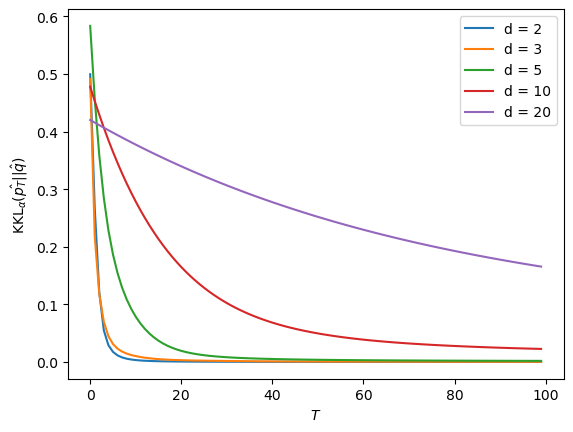

In [6]:
for d in [2,3,5,10,20]:
    
    mu_x = np.ones(d)
    mu_y = np.zeros(d)
    Lx = np.random.randn(d,d)
    Ly = np.random.randn(d,d)
    Sigmax = Lx.T @ Lx
    Sigmay = Ly.T @ Ly
    
    x0 = scs.multivariate_normal.rvs(mu_x,Sigmax,n)
    y = scs.multivariate_normal.rvs(mu_y,Sigmay,m)
    # np.median(np.linalg.norm(x0[None,:] - y[:,None],axis = 2)) 
    sigma = 4*np.sqrt(1/(n+m)**2 * np.sum((x0[:,None]-y[None,:])**2)) * (n+m)**(-1/(d+4))#np.around(np.mean(np.abs(x0[:,None]-y[None,:])**2),decimals = 1)
    print(sigma)
    k = lambda x,y :  kl.k_gauss(x,y,sigma)
    dk = lambda x,y : kl.dk_gauss(x,y,sigma)
 
    
    Ky = 1/m * k(y,y) 
    Ly,V = np.linalg.eig(Ky)
    V = V.transpose()
    Ly = np.real(Ly)
    Packy = [Ky,Ly,V]
    
    h = 2
    J = lambda x : dv.KKL(x, y, k, Packy, alpha) 
    dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Packy, alpha, sigma) 
    
    X,l_J,Grad = gd.gradient_descent(J, dJ, x0, h, eps, T)
    plt.plot(l_J,label = "d = " + str(d))
plt.legend()
plt.xlabel(r"$T$")
plt.ylabel(r"KKL$_{\alpha}(\hat{p_T} || \hat{q})$")
#plt.title("Evolution of " + r"$KKL_{\alpha}(\hat{p_T} || \hat{q})$" + " along the iterations of gradient descent")
plt.savefig('plots_neurips/gd_gauss_d.pdf')

# p gaussian and q mixture of gaussians 

In [93]:
##############################
######## PARAMETERS ##########
##############################

n = 50 # nombre de particules pour p
m = 50 # nombre de particules pour q
T = 100 # nombre d'itérations
eps = 0.0001
alpha = 0.01

### KERNEL ###


5.9
T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90
3.8
T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90
8.0
T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90
22.6
T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90
40.0
T = 0
T = 10
T = 20
T = 30
T = 40
T = 50
T = 60
T = 70
T = 80
T = 90


Text(0, 0.5, 'KKL$_{\\alpha}(\\hat{p}_T || \\hat{q})$')

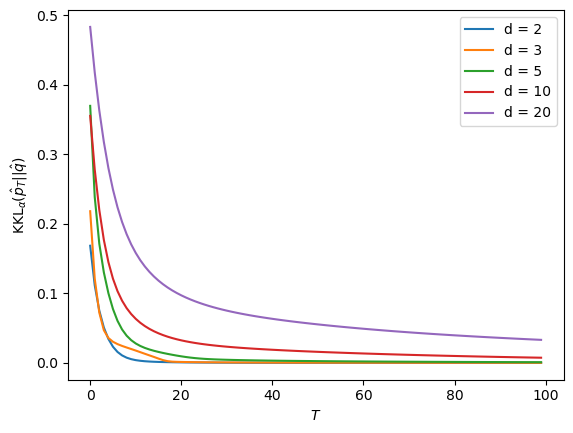

In [97]:
for d in [2,3,5,10,20]:
 
    mu_x = np.sqrt(1/(4*d)) * np.ones(d) + 0.1 * np.random.randn(d)
    MUy = [np.zeros(d),np.ones(d)]
    Lx = np.random.randn(d,d)
    Ly1 = np.random.randn(d,d)
    Ly2 = np.random.randn(d,d)
    Sigmax =  Lx.T @ Lx
    Sigmay1 =  Ly1.T @ Ly1
    Sigmay2 =  Ly2.T @ Ly2
    
    x0 = scs.multivariate_normal.rvs(mu_x,Sigmax,n)
    y = gy.mixt_gauss(MUy,[Sigmay1,Sigmay2],[1/2,1/2],m)
#     if d == 2:
#         plt.scatter(x0[:,0],x0[:,1],color = "blue")
#         plt.scatter(y[:,0],y[:,1])
#         plt.figure()
    # np.median(np.linalg.norm(x0[None,:] - y[:,None],axis = 2)) 
    sigma =np.around(np.mean(np.abs(x0[:,None]-y[None,:])**2),decimals = 1)
    print(sigma)
    k = lambda x,y :  kl.k_gauss(x,y,sigma)
    dk = lambda x,y : kl.dk_gauss(x,y,sigma)
 
    
    Ky = 1/m * k(y,y) 
    Ly,V = np.linalg.eig(Ky)
    V = V.transpose()
    Ly = np.real(Ly)
    Packy = [Ky,Ly,V]
    
    h = np.sqrt(1/n**2 * np.sum((x0[:,None]-y[None,:])**2)) * n**(-1/(d+4))
    
    J = lambda x : dv.KKL(x, y, k, Packy, alpha) 
    dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Packy, alpha, sigma) 
    
    X,l_J,Grad = gd.gradient_descent(J, dJ, x0, h, eps, T)
    plt.plot(l_J,label = "d = " + str(d))
plt.legend()
plt.xlabel(r"$T$")
plt.ylabel(r"KKL$_{\alpha}(\hat{p}_T || \hat{q})$")
#plt.title("Evolution of " + r"$KKL_{\alpha}(\hat{p_T} || \hat{q})$" + " along the iterations of gradient descent")
#plt.savefig('plots_neurips/gd_mixgauss_d.pdf')